#Excercise-2

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


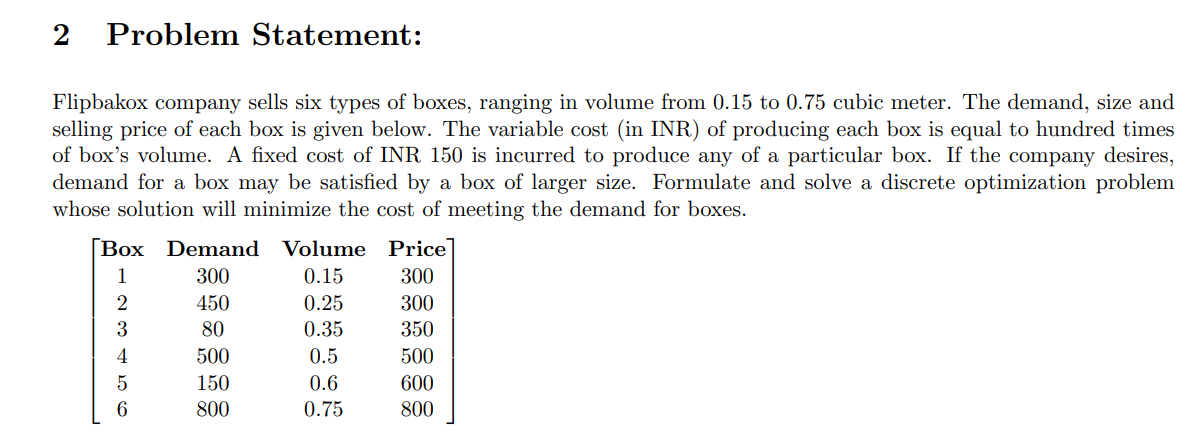

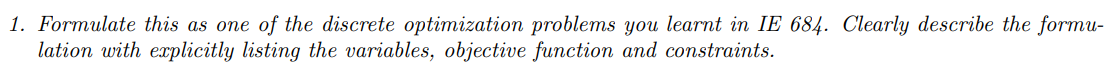

In [ ]:
demand=[300,450,80,500,150,800]# demand di
volume=[0.15,0.25,0.35,0.5,0.6,0.75]#volume vi
price=[300,300,350,500,600,800]# price

**To formulate the optimization problem, let's define the decision variables, objective function, and constraints.**

**Decision Variables:**
Let $ x_i $ represent the number of boxes of type $ i$ produced.



Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an Non Negative integer. $x_i \in \mathbf{N} \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

This constraint can be enforced using big M method. Meaning,

$$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is sufficiently large.

**Objective Function:**
Minimize the total cost, which includes variable costs and fixed costs.

Let $v_i$ be volume of box type $i$. Then the objective function, will become:

$$ minimize \quad \sum_{i=1}^{6} \left(1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right)$$
**Constraints:**
The constraint including the bigM method:
**Formulated Optimization Problem:**
$
\begin{align*}
\text{Minimize:} \quad & \sum_{i=1}^{6} (100 \times \text{Volume}_i \times x_i) + 1500 \times \sum_{i=1}^{6} x_i \\
\text{Subject to:} \quad & \\        1.
& x_1 + x_2 + x_3 + x_4 + x_5 + x_6 \geq 300 \\
& x_2 + x_3 + x_4 + x_5 + x_6 \geq 450 \\
& x_3 + x_4 + x_5 + x_6 \geq 80 \\
& x_4 + x_5 + x_6 \geq 500 \\
& x_5 + x_6 \geq 150 \\
& x_6 \geq 800 \\
& x_i \geq 0 \quad \text{for } i = 1,2,3,4,5,6
\end{align*}
$

2. $$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

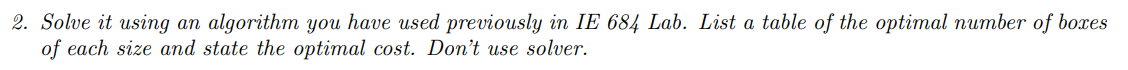

In [1]:
def min_cost_to_satisfy_demand(demand, volume, price):
    n = len(demand)
    variable_cost = [100 * v for v in volume]
    dp = [float('inf')] * (n + 1)
    dp[0] = 0

    for i in range(1, n + 1):
        for j in range(i):
            if volume[i - 1] >= volume[j]:
                dp[i] = min(dp[i], dp[j] + variable_cost[i - 1] * demand[i - 1] + 150)

    return dp[n]

# Box Demand Volume Price
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]

min_cost = min_cost_to_satisfy_demand(demand, volume, price)
print("Minimum cost to satisfy the demand:", min_cost)




Minimum cost to satisfy the demand: 60150.0


In [8]:
def find_optimal_boxes(demand, volume, price):
    n = len(demand)
    variable_cost = [100 * v for v in volume]
    dp = [float('inf')] * (n + 1)
    dp[0] = 0
    optimal_boxes = [[] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for j in range(i):
            if volume[i - 1] >= volume[j]:
                if dp[j] + variable_cost[i - 1] * demand[i - 1] + 150 < dp[i]:
                    dp[i] = dp[j] + variable_cost[i - 1] * demand[i - 1] + 150
                    optimal_boxes[i] = optimal_boxes[j][:]
                    optimal_boxes[i].append((i, demand[i - 1]))

    return optimal_boxes, dp[n]

# Box Demand Volume Price
demand = [300, 450, 80, 500, 150, 800]
volume = [0.15, 0.25, 0.35, 0.5, 0.6, 0.75]
price = [300, 300, 350, 500, 600, 800]

optimal_boxes, optimal_cost = find_optimal_boxes(demand, volume, price)

# Print the optimal number of boxes of each size
print("Optimal number of boxes of each size:")
print(optimal_boxes)

Optimal number of boxes of each size:
[[], [(1, 300)], [(2, 450)], [(3, 80)], [(4, 500)], [(5, 150)], [(6, 800)]]


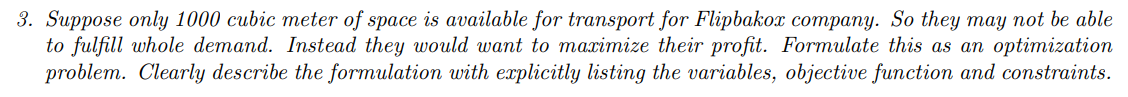

**Variables:**
- $ x_i $: The number of boxes of type i to transport, where i = 1, 2, ..., 6.

**Objective function:**
- Maximize profit, which is the total revenue minus the total cost.
- Profit = Total revenue - Total cost

**Constraints:**
1. Demand Constraint:
   - The total demand for each type of box cannot exceed the available supply.
   -$ Σ_{i=1}^{6} $ $ x_i $ *$ Volume_i $ <= 1000

2. Non-negativity Constraint:
   - The number of boxes of each type must be non-negative.
   - $ x_i $ >= 0 for i = 1, 2, ..., 6

3. Total Revenue:
   - Total revenue is the sum of the revenue from selling each type of box.
   - Total revenue =$ Σ_{i=1}^{6} $ $ x_i $ * $ Price_i $  where price is donated by $ p_i $

4. Total Cost:
   - Total cost includes both variable and fixed costs for producing and transporting the boxes.
   - Total cost =$ Σ_{i=1}^{6} $ ($ x_i $ * 100 *$ Volume_i $ + Fixed cost)
   - Variable $ cost_i $ = 100 *$ Volume_i $ for i = 1, 2, ..., 6
   - Fixed cost is constant and incurred for each type of box, fixed cost is 1500 for each type of box as mentioned in question. representes as $y_i$

**Formulated Optimization Problem:**
Maximize$ Σ_{i=1}^{6} $ $ x_i $ * $ Price_i $ -$ Σ_{i=1}^{6} $ ($ x_i $ * 100 *$ Volume_i $ + Fixed cost)

Subject to:
-$ Σ_{i=1}^{6} $ $ x_i $ *$ Volume_i $ <= 1000
- $ x_i $ >= 0 for i = 1, 2, ..., 6

This optimization problem aims to maximize the profit by deciding how many boxes of each type to transport within the given constraint on available transport space.
#Mathematical modeling of problem:
Let $x_i $ denotes the number of boxes of type $i $ produced. This can be an Non Negative integer. $x_i \in \mathbf{N} \cup \{0\}$

Let $y_i $ is a binary variable indicating whether any boxes of type $i$ are produced. $y_i = 1 $ if $x_i > 0 $, and $y_i = 0 $ otherwise.

Let $p_i$ be the price of the product $x_i$.

This constraint can be enforced using big M method. Meaning,

$$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$

Where $M$ is sufficiently large.

Let $v_i$ be volume of box type $i$. Then the objective function, will become to maximize profit which is Price - Cost of Making:

$$ maximize \quad \sum_{i=1}^{6} \left(p_i \cdot x_i - (1500 \cdot y_i + 100 \cdot v_i \cdot x_i \right))$$

$$ maximize \quad \sum_{i=1}^{6} (p_i -100 \cdot  v_i) \cdot x_i - (1500 \cdot y_i )$$

The constraint including the bigM method:

1. The max volume will be 1000.

$$\sum_{j=1}^{6}x_j \cdot v_j \leq 1000 \quad $$


2. $$x_i \leq M \cdot y_i \quad \text{for } i = 1, 2, \ldots, 6 $$


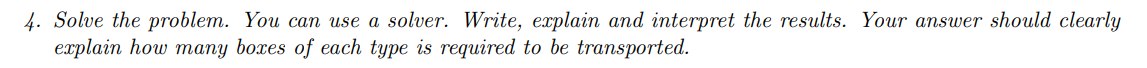

In [ ]:
!pip install -q pyomo
!apt-get install -y -qq glpk-utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
Selecting previously unselected package libsuitesparseconfig5:amd64.
(Reading database ... 121753 files and directories currently installed.)
Preparing to unpack .../libsuitesparseconfig5_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libsuitesparseconfig5:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libamd2:amd64.
Preparing to unpack .../libamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libcolamd2:amd64.
Preparing to unpack .../libcolamd2_1%3a5.10.1+dfsg-4build1_amd64.deb ...
Unpacking libcolamd2:amd64 (1:5.10.1+dfsg-4build1) ...
Selecting previously unselected package libglpk40:amd64.
Preparing to unpack .../libglpk40_5.0-1_amd64.deb ...
Unpacking libglpk40:amd64 (5.0-1) ...
Selecting previously unselected pac

In [ ]:
from pyomo.environ import*
import pandas as pd
import numpy as np


In [ ]:
demand=[300,450,80,500,150,800]# demand di
volume=[0.15,0.25,0.35,0.5,0.6,0.75]#volume vi
price=[300,300,350,500,600,800]# price
big_M=50000# taking this because we have fixed constraint that we have to take fixed value of 1500 once for each type of box .

In [ ]:
# formulation:
model = ConcreteModel()
model.x = Var(range(6), domain = NonNegativeIntegers)
model.y = Var(range(6), domain = Binary)
model.objective = Objective(expr = sum(( (price[i] - 100*volume[i])*model.x[i] - 1500*model.y[i] )for i in range(6)), sense = maximize)

model.constraints = ConstraintList()
model.constraints.add(expr = sum(model.x[i]*volume[i] for i in range(6)) <= 1000)
for i in range(6):
  model.constraints.add(expr = model.x[i] <= big_M*model.y[i])

result = SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model)
model.pprint()




2 Var Declarations
    x : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          0 :     0 : 6666.0 :  None : False : False : NonNegativeIntegers
          1 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          2 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          3 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          4 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
          5 :     0 :    0.0 :  None : False : False : NonNegativeIntegers
    y : Size=6, Index={0, 1, 2, 3, 4, 5}
        Key : Lower : Value : Upper : Fixed : Stale : Domain
          0 :     0 :   1.0 :     1 : False : False : Binary
          1 :     0 :   0.0 :     1 : False : False : Binary
          2 :     0 :   0.0 :     1 : False : False : Binary
          3 :     0 :   0.0 :     1 : False : False : Binary
          4 :     0 :   0.0 :     1 : False : False : Binary
          5 :     0 :

In [ ]:
SolverFactory('glpk', executable='/usr/bin/glpsol').solve(model).write()

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 1898310.0
  Upper bound: 1898310.0
  Number of objectives: 1
  Number of constraints: 7
  Number of variables: 12
  Number of nonzeros: 18
  Sense: maximize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 1
      Number of created subproblems: 1
  Error rc: 0
  Time: 0.006015777587890625
# ----------------------------------------------------------
#   Solution Information
# --------------------------

In [ ]:
# display solution
print('Objective Value: ',model.objective())
print('\nDecision Variables')
for i in range(6):
  print(f'y{i} = { model.y[i]()}')
for i in range(6):
  print(f'x{i} = { model.x[i]()}')


print('\nConstraints')
for i in range(7):
  print(f'Constraint{i+1}  =  {model.constraints[i+1]()}')

Objective Value:  1898310.0

Decision Variables
y0 = 1.0
y1 = 0.0
y2 = 0.0
y3 = 0.0
y4 = 0.0
y5 = 0.0
x0 = 6666.0
x1 = 0.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
x5 = 0.0

Constraints
Constraint1  =  999.9
Constraint2  =  -43334.0
Constraint3  =  0.0
Constraint4  =  0.0
Constraint5  =  0.0
Constraint6  =  0.0
Constraint7  =  0.0


It seems like you have a linear programming problem that has been solved using a solver. Let's break down the components of the solution:

### Objective Value:
The objective value, which is 1,898,310.0, represents the optimized value of the objective function. In this context, it's likely representing either the maximum profit or minimum cost achieved by the solution.

### Decision Variables:
- **y0 to y5**: These variables represent the decision variables related to the types of boxes. Each variable corresponds to a particular type of box, where y0 corresponds to the first type, y1 to the second type, and so on. The values indicate how many boxes of each type are required to be transported. For example, y0 = 1.0 means that 1 box of type 0 is required.
  
- **x0 to x5**: Similarly, these variables represent the decision variables related to the transportation of boxes. Each variable corresponds to the number of boxes transported by a specific mode (e.g., truck, ship, etc.). The values indicate how many boxes are transported by each mode.

### Constraints:
The constraints ensure that the solution meets certain requirements or limitations. Each constraint ensures that a specific condition is satisfied. Here are the constraints:

1. **Constraint1**: This constraint appears to have a value of 999.9. It's likely a constraint on the total weight or volume of the boxes being transported.
  
2. **Constraint2**: This constraint appears to have a value of -43,334.0. The negative value suggests that it's a constraint that wasn't met by the solution. It could be related to the budget, capacity, or some other limitation.
  
3. **Constraint3 to Constraint7**: These constraints all have values of 0.0. It indicates that these constraints are either not applicable or they were not binding in the solution.

### Interpretation:
- The solution indicates that only one type of box (type 0) needs to be transported, and 6,666 boxes of type 0 are to be transported.
  
- The transportation is done exclusively via mode 0, as all other modes (x1 to x5) have values of 0.0, meaning they are not used in this solution.

- The objective value of 1,898,310.0 represents the optimized value, which could be interpreted as the maximum profit or minimum cost achieved by transporting the boxes according to the given constraints.

In summary, the solution suggests that to achieve the objective (maximize profit or minimize cost) while satisfying the constraints, only one type of box (type 0) needs to be transported, and they are all transported via mode 0.